In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio as rio
import matplotlib.colors as colors
import cartopy.crs as ccrs
import numpy as np
import pandas as pd
import jenkspy
from shapely import wkt

In [2]:
raster_path = "../data/processed/monthly_drought_labels/2016_08.tif"
shp_path_prov = "../data/external/Angola_provinces"
shp_path_mun = "../data/external/Angola_municipal"

with rio.open(raster_path) as src:
    bounds = src.bounds
    nodata_val = src.nodatavals
    crs = src.crs
    drought_labels = src.read(1)
shp_prov = gpd.read_file(shp_path_prov)
shp_mun = gpd.read_file(shp_path_mun)
shp_prov = shp_prov.to_crs(crs)

In [3]:
ds = pd.read_csv('../results/indices/mun_ds_index.csv')
sv = pd.read_csv('../results/indices/mun_svi_index_with_category.csv', encoding='latin1')

In [11]:
sv

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,SVI_Final,Physical,Social,Demographic,Health,Economic,Agricultural,SVI (Equal Weight),SVI (Weighted),SVI Category
0,11.081858,3.895819,Alto Zambeze,AO15128,NaN,NaN,NaN,Moxico,AO15,Angola,...,0.465903,0.577834,0.728971,0.036268,0.235435,0.134467,0.516845,0.465903,0.371637,2
1,2.398922,0.268118,Ambaca,AO06037,NaN,NaN,NaN,Cuanza Norte,AO06,Angola,...,0.438932,0.610561,0.672541,0.114611,0.028294,0.082859,0.681188,0.438932,0.365009,2
2,1.377209,0.093426,Amboim (Gabela),AO07050,NaN,NaN,NaN,Cuanza Sul,AO07,Angola,...,0.471734,0.643561,0.794180,0.120845,0.048576,0.126043,0.501605,0.471734,0.372468,2
3,3.202270,0.318489,Ambriz,AO01001,NaN,NaN,NaN,Bengo,AO01,Angola,...,0.467146,0.509747,0.474574,0.100469,0.150779,0.205110,0.510340,0.467146,0.325170,1
4,3.185815,0.390914,AmbuÃ­la,AO17143,Ambuila,NaN,NaN,UÃ­ge,AO17,Angola,...,0.454418,0.585237,0.833333,0.026888,0.176310,0.056360,0.534637,0.454418,0.368794,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,UÃ­ge,AO17157,Uige,NaN,NaN,UÃ­ge,AO17,Angola,...,0.417462,0.186871,0.180645,0.094910,0.101915,0.109790,0.565010,0.417462,0.206524,0
157,1.811313,0.137028,Ukuma,AO10091,NaN,NaN,NaN,Huambo,AO10,Angola,...,0.447501,0.545092,0.734251,0.118506,0.050183,0.090273,0.573863,0.447501,0.352028,2
158,1.067830,0.054372,Viana,AO11100,NaN,NaN,NaN,Luanda,AO11,Angola,...,0.429535,0.590206,0.630630,0.109631,0.151451,0.097273,0.476272,0.429535,0.342577,1
159,5.394919,1.306706,Virei,AO16141,NaN,NaN,NaN,Namibe,AO16,Angola,...,0.474709,0.795336,0.781058,0.083356,0.048430,0.146838,0.546702,0.474709,0.400287,3


In [10]:
ds['geometry'] = ds['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(ds, crs='epsg:4326')
gdf

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Final Drought Severity Index,Final Norm Drought Severity Index,Final Drought Severity Classes
0,11.081858,3.895819,Alto Zambeze,AO15128,NaN,NaN,NaN,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",48.979933,0.808023,3
1,2.398922,0.268118,Ambaca,AO06037,NaN,NaN,NaN,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",26.794872,0.442035,1
2,1.377209,0.093426,Amboim (Gabela),AO07050,NaN,NaN,NaN,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",25.071429,0.413604,1
3,3.202270,0.318489,Ambriz,AO01001,NaN,NaN,NaN,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,NaN,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",42.062500,0.693906,3
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",32.580645,0.537483,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",23.562500,0.388711,1
157,1.811313,0.137028,Ukuma,AO10091,NaN,NaN,NaN,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",12.894737,0.212725,0
158,1.067830,0.054372,Viana,AO11100,NaN,NaN,NaN,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",28.333333,0.467415,1
159,5.394919,1.306706,Virei,AO16141,NaN,NaN,NaN,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",23.558974,0.388653,1


In [13]:
gdf['Socioeconomic Vulnerability Index (Weighted)'] = sv['SVI (Weighted)']
gdf['SVI Category'] = sv['SVI Category']
gdf

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,Final Drought Severity Index,Final Norm Drought Severity Index,Final Drought Severity Classes,Socioeconomic Vulnerability Index (Weighted),SVI Category
0,11.081858,3.895819,Alto Zambeze,AO15128,NaN,NaN,NaN,Moxico,AO15,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",48.979933,0.808023,3,0.371637,2
1,2.398922,0.268118,Ambaca,AO06037,NaN,NaN,NaN,Cuanza Norte,AO06,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",26.794872,0.442035,1,0.365009,2
2,1.377209,0.093426,Amboim (Gabela),AO07050,NaN,NaN,NaN,Cuanza Sul,AO07,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",25.071429,0.413604,1,0.372468,2
3,3.202270,0.318489,Ambriz,AO01001,NaN,NaN,NaN,Bengo,AO01,Angola,AO,2018-08-30,2018-09-04,NaN,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",42.062500,0.693906,3,0.325170,1
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",32.580645,0.537483,2,0.368794,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,NaN,NaN,Uíge,AO17,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",23.562500,0.388711,1,0.206524,0
157,1.811313,0.137028,Ukuma,AO10091,NaN,NaN,NaN,Huambo,AO10,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",12.894737,0.212725,0,0.352028,2
158,1.067830,0.054372,Viana,AO11100,NaN,NaN,NaN,Luanda,AO11,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",28.333333,0.467415,1,0.342577,1
159,5.394919,1.306706,Virei,AO16141,NaN,NaN,NaN,Namibe,AO16,Angola,AO,2018-08-30,2018-09-04,NaN,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",23.558974,0.388653,1,0.400287,3


We are not using the normalized drought severity index as followed by Dabanli and Nasrollahi!

In [23]:
sv_ds_index

0      0.300291
1      0.161347
2      0.154054
3      0.225637
4      0.198221
         ...   
156    0.080278
157    0.074885
158    0.160126
159    0.155572
160    0.217997
Length: 161, dtype: float64

In [22]:
sv_ds_index = gdf['Socioeconomic Vulnerability Index (Weighted)'] * gdf['Final Norm Drought Severity Index']
sv_ds_index.describe()

count    161.000000
mean       0.187349
std        0.072140
min        0.000000
25%        0.141564
50%        0.184825
75%        0.241464
max        0.366112
dtype: float64

In [24]:
gdf['SV-DS Index'] = sv_ds_index
breaks = jenkspy.jenks_breaks(gdf['SV-DS Index'], n_classes=4)
gdf['SV-DS Category'] = pd.cut(gdf['SV-DS Index'], bins=breaks, labels=[0,1,2,3])
gdf

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,...,validOn,validTo,geometry,Final Drought Severity Index,Final Norm Drought Severity Index,Final Drought Severity Classes,Socioeconomic Vulnerability Index (Weighted),SVI Category,SV-DS Index,SV-DS Category
0,11.081858,3.895819,Alto Zambeze,AO15128,NaN,NaN,NaN,Moxico,AO15,Angola,...,2018-09-04,NaN,"POLYGON ((24.01637 -11.01829, 24.01387 -11.030...",48.979933,0.808023,3,0.371637,2,0.300291,3
1,2.398922,0.268118,Ambaca,AO06037,NaN,NaN,NaN,Cuanza Norte,AO06,Angola,...,2018-09-04,NaN,"POLYGON ((15.49116 -8.05464, 15.49820 -8.05608...",26.794872,0.442035,1,0.365009,2,0.161347,1
2,1.377209,0.093426,Amboim (Gabela),AO07050,NaN,NaN,NaN,Cuanza Sul,AO07,Angola,...,2018-09-04,NaN,"POLYGON ((14.56600 -10.76659, 14.56905 -10.789...",25.071429,0.413604,1,0.372468,2,0.154054,1
3,3.202270,0.318489,Ambriz,AO01001,NaN,NaN,NaN,Bengo,AO01,Angola,...,2018-09-04,NaN,"MULTIPOLYGON (((13.12708 -7.83736, 13.12708 -7...",42.062500,0.693906,3,0.325170,1,0.225637,2
4,3.185815,0.390914,Ambuíla,AO17143,Ambuila,NaN,NaN,Uíge,AO17,Angola,...,2018-09-04,NaN,"POLYGON ((14.62844 -7.35135, 14.64951 -7.35803...",32.580645,0.537483,2,0.368794,2,0.198221,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1.476876,0.109907,Uíge,AO17157,Uige,NaN,NaN,Uíge,AO17,Angola,...,2018-09-04,NaN,"POLYGON ((15.29576 -7.62523, 15.29229 -7.62632...",23.562500,0.388711,1,0.206524,0,0.080278,0
157,1.811313,0.137028,Ukuma,AO10091,NaN,NaN,NaN,Huambo,AO10,Angola,...,2018-09-04,NaN,"POLYGON ((15.34876 -12.51497, 15.36649 -12.538...",12.894737,0.212725,0,0.352028,2,0.074885,0
158,1.067830,0.054372,Viana,AO11100,NaN,NaN,NaN,Luanda,AO11,Angola,...,2018-09-04,NaN,"POLYGON ((13.53439 -8.88916, 13.52679 -8.89795...",28.333333,0.467415,1,0.342577,1,0.160126,1
159,5.394919,1.306706,Virei,AO16141,NaN,NaN,NaN,Namibe,AO16,Angola,...,2018-09-04,NaN,"POLYGON ((12.70932 -15.20356, 12.73147 -15.216...",23.558974,0.388653,1,0.400287,3,0.155572,1


In [25]:
four_colors = [
    "yellow",
    "orange",
    "red",
    "darkred",
]
cmap2 = colors.ListedColormap(four_colors)

c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:463: UserWarning: The .xlabels_bottom attribute is deprecated. Please use .bottom_labels to toggle visibility instead.
  warnings.warn('The .xlabels_bottom attribute is deprecated. Please '
c:\Users\esl26\AppData\Local\anaconda3\envs\research\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
C:\Users\esl26\AppData\Local\Temp\ipykernel_67096\3635357770.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])


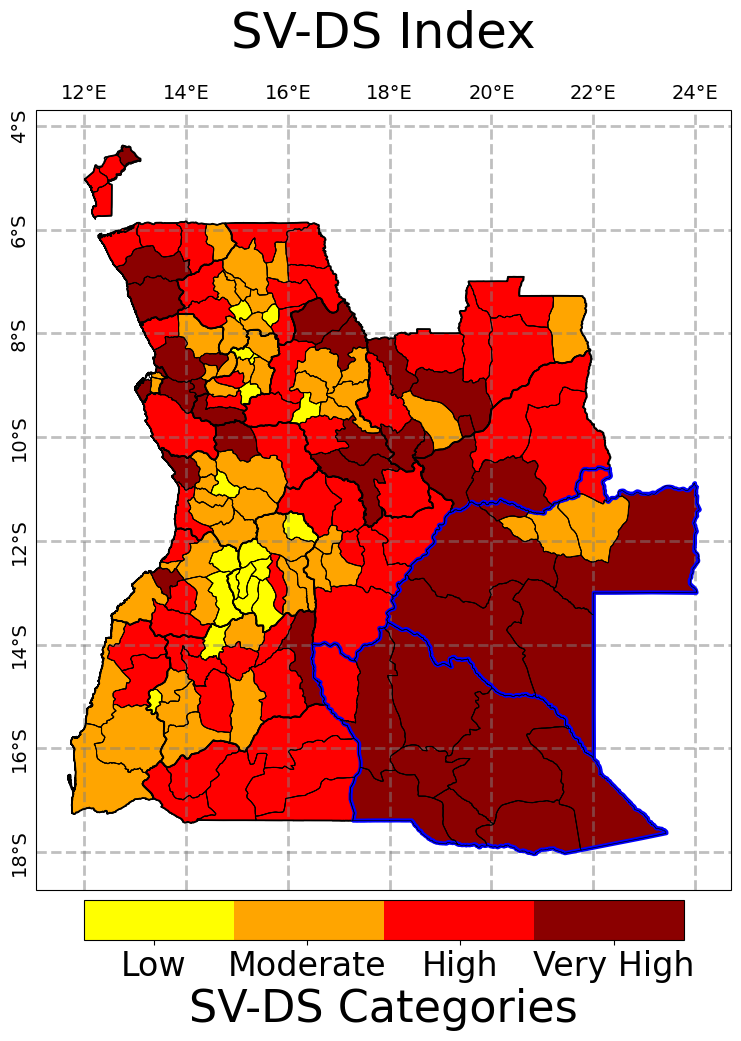

In [26]:
fig = plt.figure(figsize=(10, 10))
img_extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.78], projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray',
                alpha=0.5, linestyle='--', ylabel_style={'size': 14, 'rotation': 'vertical'}, 
                xlabel_style={'size': 14})

gl.xlabels_bottom = False
gl.ylabels_right = False

plot = gdf.plot(ax=ax, column='SV-DS Category', cmap=cmap2, linewidth=0.8, edgecolor='black')
shp_prov.geometry.boundary.plot(ax=ax, color='black', linewidth=1.25)
shp_prov[shp_prov.NAME == 'Kuando Kubango'].geometry.boundary.plot(ax=ax, color='blue', linewidth = 3)
shp_prov[shp_prov.NAME == 'Moxico'].geometry.boundary.plot(ax=ax, color='blue', linewidth = 3)
shp_mun.geometry.boundary.plot(ax=ax, color='black', linewidth=0.5)

cbar_ax = fig.add_axes([0.20, 0.05, 0.6, 0.04])
cbar = plt.colorbar(plot.collections[0], cax=cbar_ax, orientation='horizontal', pad=0.05)
cbar.ax.tick_params(labelsize=24)
cbar.set_label('SV-DS Categories', fontsize=32)
cbar.set_ticklabels(['Low', 'Moderate','High','Very High'])
cbar.set_ticks(np.linspace(0.35,2.65,4))

fig.suptitle('SV-DS Index', fontsize=36)

plt.savefig(f'../results/figures/mun_final_sv_ds.png', dpi=300, bbox_inches='tight')

In [19]:
shp_prov

,NAME,SHPAREASQM,CODE_PROV,geometry
0,Bengo,3.799123e+10,01,"MULTIPOLYGON (((13.12321 -7.83117, 13.12409 -7..."
1,Benguela,3.954707e+10,02,"MULTIPOLYGON (((12.53478 -13.49164, 12.53566 -..."
2,Bié,7.214479e+10,03,"POLYGON ((16.51990 -12.92742, 16.51794 -12.921..."
3,Cabinda,6.975749e+09,04,"POLYGON ((12.71099 -4.46888, 12.71347 -4.46740..."
4,Kuando Kubango,1.997968e+11,05,"POLYGON ((22.23646 -16.57306, 22.26215 -16.575..."
5,Kwanza Norte,2.029464e+10,06,"POLYGON ((14.54237 -9.77922, 14.53348 -9.77422..."
6,Kwanza Sul,5.539526e+10,07,"POLYGON ((15.26511 -9.79956, 15.27292 -9.79810..."
7,Kunene,7.735317e+10,08,"POLYGON ((16.29437 -17.38978, 15.38930 -17.386..."
8,Huambo,3.318300e+10,09,"POLYGON ((16.32605 -11.60639, 16.32709 -11.611..."
9,Huíla,7.874020e+10,10,"POLYGON ((15.54472 -13.76052, 15.56128 -13.756..."


Save to CSV file

In [18]:
gdf.to_csv('../results/indices/mun_sv_ds_index.csv', index=False)

Can we show which municiplaties increased or decreased vulnerability when socioeconomic indicator data were incorporated?